In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

In [2]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the labels are:
- 0 T-shirt/top
- 1 Trouser 
- 2 Pullover 
- 3 Dress 
- 4 Coat 
- 5 Sandal 
- 6 Shirt 
- 7 Sneaker 
- 8 Bag 
- 9 Ankle boot

In [4]:
some_instance = np.array(df[:1].drop('label',axis=1))
some_instance_image = some_instance.reshape(28, 28)

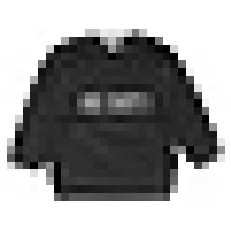

In [5]:
plt.imshow(some_instance_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


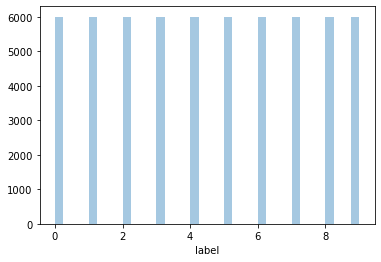

In [8]:
sns.distplot(df['label'],kde= False)

In [4]:
target=df['label']
data=df.drop(['label'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=10000 ,random_state=0)

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc

RandomForestClassifier()

In [11]:
rfc.feature_importances_

array([7.22318626e-07, 5.20444504e-06, 1.82744906e-05, 3.60531943e-05,
       1.00730075e-04, 1.30275669e-04, 1.82540389e-04, 3.64519988e-04,
       4.10796427e-04, 6.28182354e-04, 1.67936345e-03, 1.36045794e-03,
       1.38442898e-03, 1.88801657e-03, 2.39695180e-03, 1.23879990e-03,
       7.80995555e-04, 2.17256970e-03, 1.38561086e-03, 4.63019925e-04,
       4.15203815e-04, 2.81930358e-04, 1.66667924e-04, 9.40488979e-05,
       4.49309436e-05, 2.58940888e-05, 3.62457266e-06, 1.30563684e-06,
       1.08302725e-06, 3.33076331e-06, 2.43070415e-05, 6.87861609e-05,
       1.48911279e-04, 2.12743971e-04, 2.88067404e-04, 1.66688239e-03,
       2.37901078e-03, 4.47539241e-03, 1.97126145e-03, 4.59670564e-03,
       1.39236526e-03, 1.75592459e-03, 1.96093436e-03, 2.00052675e-03,
       3.04382664e-03, 2.52161032e-03, 3.35136189e-03, 3.32950835e-03,
       2.00722696e-03, 6.12904390e-04, 3.09377984e-04, 2.19099271e-04,
       1.28005989e-04, 8.24907442e-05, 1.38125548e-05, 1.81636386e-06,
      

In [12]:
#the code in the next 2 blocks is taken from "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" github:
#https://github.com/ageron/handson-ml2
def plot_instance(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")

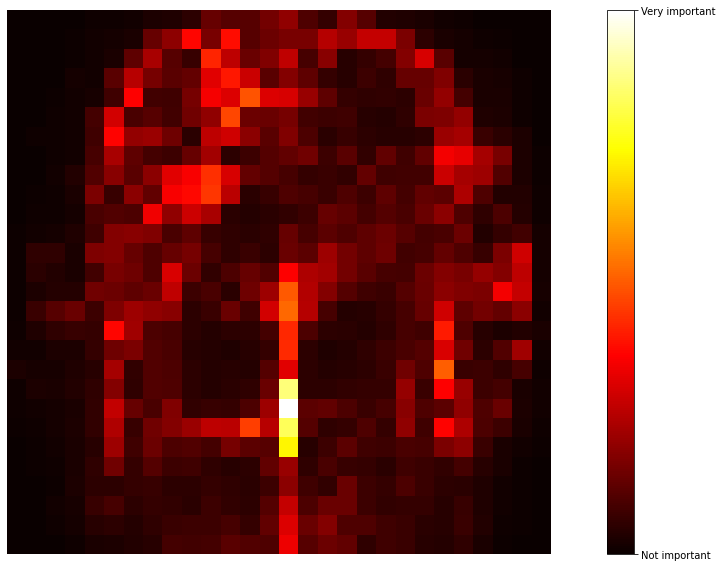

In [13]:
plt.figure(figsize=(20, 10))
plot_instance(rfc.feature_importances_)
cbar = plt.colorbar(ticks=[rfc.feature_importances_.min(), rfc.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [5]:
sc= StandardScaler()

In [6]:
scaled_train = sc.fit_transform(X_train)

In [7]:
scaled_test = sc.transform(X_test)

In [17]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,y_train)
rfc

RandomForestClassifier()

In [18]:
y_pred = rfc.predict(scaled_test)

In [19]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       991
           1       1.00      0.97      0.98       984
           2       0.78      0.82      0.80       999
           3       0.90      0.92      0.91      1059
           4       0.77      0.84      0.80       989
           5       0.96      0.96      0.96      1008
           6       0.75      0.58      0.66      1008
           7       0.94      0.94      0.94       949
           8       0.95      0.96      0.96      1020
           9       0.94      0.95      0.95       993

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(159.0, 0.5, 'Actual')

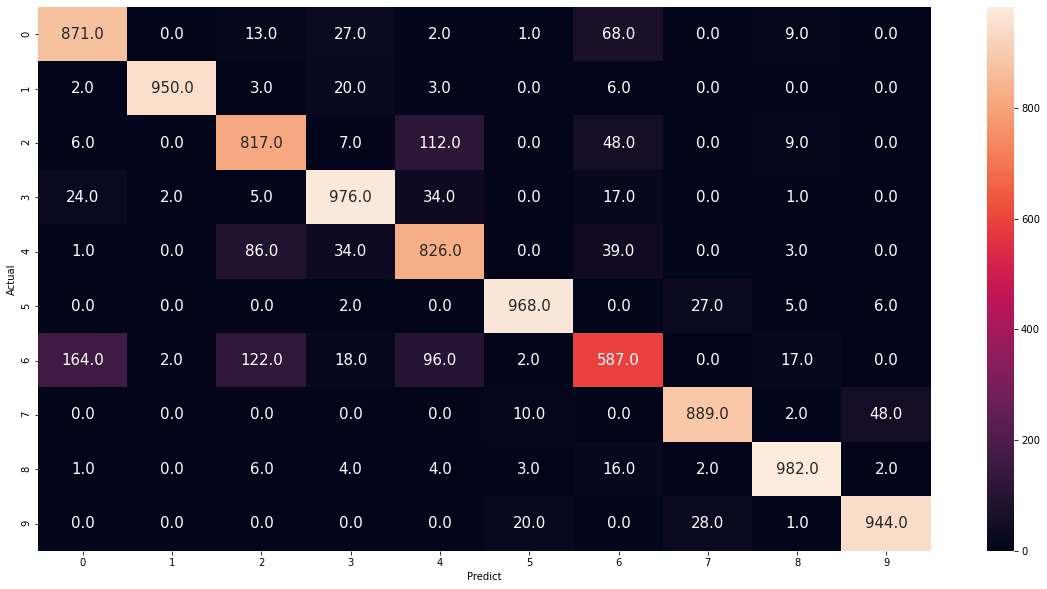

In [20]:
plt.figure(figsize=(20, 10))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [21]:
#the code in the next 2 blocks is taken from "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" github:
#https://github.com/ageron/handson-ml2
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

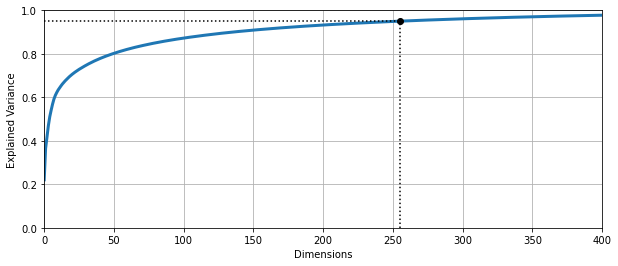

In [22]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [8]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
pca = PCA(n_components=0.95)

In [9]:
redueced_train = pca.fit_transform(scaled_train)

In [10]:
redueced_train.shape

(50000, 255)

In [11]:
X_test_reduced = pca.transform(scaled_test)
X_test_reduced.shape

(10000, 255)

In [42]:
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])

In [43]:
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])

In [44]:
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [45]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [46]:
path = dtc.cost_complexity_pruning_path(redueced_train,y_train)
alphas = path.ccp_alphas

In [47]:
param_dtc = {'dtc__ccp_alpha':alphas}

In [48]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [51]:
grid_knn = RandomizedSearchCV(pipe_knn,param_knn,scoring='accuracy')
grid_dtc = RandomizedSearchCV(pipe_dtc,param_dtc,scoring='accuracy')
grid_rfc = RandomizedSearchCV(pipe_rfc,param_rfc,scoring='accuracy')

In [52]:
grid_knn.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.95)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [2, 4, 6, 8, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='accuracy')

In [55]:
grid_dtc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.95)),
                                             ('dtc',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dtc__ccp_alpha': array([0.00000000e+00, 1.91489362e-05, 1.94117647e-05, ...,
       5.24629773e-02, 6.45982187e-02, 7.17327227e-02])},
                   scoring='accuracy')

In [58]:
grid_rfc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.95)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18, 20],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   scoring='accuracy')

In [54]:
grid_knn.best_score_

0.8643000000000001

In [53]:
grid_knn.best_params_

{'knn__weights': 'distance', 'knn__n_neighbors': 6}

In [56]:
grid_dtc.best_score_

0.79355

In [57]:
grid_dtc.best_params_

{'dtc__ccp_alpha': 0.00014194805194805196}

In [59]:
grid_rfc.best_score_

0.8628333333333333

In [60]:
grid_rfc.best_params_

{'rfc__n_estimators': 400, 'rfc__max_depth': 18}

In [68]:
vot = VotingClassifier(estimators=[('dtc', grid_dtc.best_estimator_), ('knn', grid_knn.best_estimator_), ('rfc', grid_rfc.best_estimator_)],
voting='soft')

In [70]:
cross_val_score(vot,data,target,scoring='accuracy').mean()

0.858

In [18]:
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')
dtc = DecisionTreeClassifier(ccp_alpha= 0.00014194805194805196)
rfc = RandomForestClassifier(n_estimators=400,max_depth=18)
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [13]:
vot2 = VotingClassifier(estimators=[('knn', pipe_knn), ('rfc', pipe_rfc)],
voting='soft')

In [72]:
cross_val_score(vot2,data,target,scoring='accuracy').mean()

0.8692

In [132]:
xg_param = {
   'learning_rate' : np.linspace(0.3,1,8),
    'n_estimators':[100,200,300,400,500],
    'max_depth' : list(range(2,21,2))
}

In [133]:
model = xgb.XGBClassifier(use_label_encoder=False)

In [134]:
grid_model=RandomizedSearchCV(model,xg_param,scoring='accuracy',cv=10)

In [135]:
grid_model.fit(redueced_train,y_train)

[14:40:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:08:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[21:11:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:36:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[01:15:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:56:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[19:07:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [136]:
grid_model.best_score_

0.8878600000000001

In [137]:
grid_model.best_params_

{'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.39999999999999997}

In [14]:
xg = XGBClassifier(use_label_encoder=False,eval_metric= 'mlogloss',n_estimators=500,max_depth=4,learning_rate=0.4)

In [15]:
pipe_xg = Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [77]:
cross_val_score(pipe_xg,data,target,scoring='accuracy').mean()

0.8882333333333333

In [16]:
vot3 = VotingClassifier(estimators=[('xg', pipe_xg), ('vot2', vot2)],
voting='soft')

In [17]:
cross_val_score(vot3,data,target,scoring='accuracy').mean()

0.89085

In [24]:
vot3.fit(data,target)
vot3

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.95)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                     

In [ ]:
test_target=test['label']
test_data=test.drop(['label'], axis = 1)

In [26]:
y_pred = vot3.predict(test_data)

In [27]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.81      0.83      1000
           3       0.91      0.92      0.92      1000
           4       0.82      0.87      0.84      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.69      0.71      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [28]:
metrics.accuracy_score(test_target,y_pred)

0.8962

# second try
now will try to use even lower number of component for the PCA

In [8]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
pca = PCA(n_components = 50)

In [9]:
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [10]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [11]:
path = dtc.cost_complexity_pruning_path(scaled_train,y_train)
alphas = path.ccp_alphas

In [14]:
param_dtc = {'dtc__ccp_alpha':alphas}

In [12]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [15]:
grid_knn = RandomizedSearchCV(pipe_knn,param_knn,scoring='accuracy')
grid_dtc = RandomizedSearchCV(pipe_dtc,param_dtc,scoring='accuracy')
grid_rfc = RandomizedSearchCV(pipe_rfc,param_rfc,scoring='accuracy')

In [16]:
grid_knn.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=50)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [2, 4, 6, 8, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='accuracy')

In [18]:
grid_dtc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=50)),
                                             ('dtc',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dtc__ccp_alpha': array([0.00000000e+00, 1.77201728e-05, 1.93103448e-05, ...,
       5.21522083e-02, 7.21677717e-02, 8.17821616e-02])},
                   scoring='accuracy')

In [20]:
grid_rfc.fit(data,target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=50)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18, 20],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   scoring='accuracy')

In [17]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn__weights': 'distance', 'knn__n_neighbors': 8}
0.8572


In [19]:
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'dtc__ccp_alpha': 8.565934065934066e-05}
0.7974333333333334


In [21]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'rfc__n_estimators': 400, 'rfc__max_depth': 20}
0.8646333333333335


In [22]:
knn = KNeighborsClassifier(n_neighbors=8,weights='distance')
dtc = DecisionTreeClassifier(ccp_alpha= 8.565934065934066e-05)
rfc = RandomForestClassifier(n_estimators=400,max_depth=20)
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])

In [23]:
vot = VotingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc)],
voting='soft')

In [24]:
cross_val_score(vot,data,target,scoring='accuracy').mean()

0.8506

In [27]:
vot2 = VotingClassifier(estimators=[('knn', pipe_knn), ('rfc', pipe_rfc)],
voting='soft')

In [28]:
cross_val_score(vot2,data,target,scoring='accuracy').mean()

0.8659833333333333

In [29]:
xg = XGBClassifier(use_label_encoder=False,eval_metric= 'mlogloss',n_estimators=500,max_depth=4,learning_rate=0.4)

In [30]:
pipe_xg = Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [31]:
cross_val_score(pipe_xg,data,target,scoring='accuracy').mean()

0.8766833333333333

In [32]:
vot3 = VotingClassifier(estimators=[('xg', pipe_xg), ('vot2', vot2)],
voting='soft')

In [33]:
cross_val_score(vot3,data,target,scoring='accuracy').mean()

0.8792333333333333

In [34]:
test_target=test['label']
test_data=test.drop(['label'], axis = 1)

In [35]:
vot3.fit(data,target)
vot3

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=50)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                       

In [36]:
y_pred = vot3.predict(test_data)

In [37]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.79      0.81      1000
           3       0.90      0.91      0.90      1000
           4       0.81      0.86      0.83      1000
           5       0.95      0.92      0.94      1000
           6       0.70      0.66      0.68      1000
           7       0.91      0.93      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [38]:
metrics.accuracy_score(test_target,y_pred)

0.882

## Summary
with only 50 features we can reach 88.2 accuracy socre, and by using 255 features we can reach 89.62 accuracy socre